In [1]:
import json          
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import sys
from pathlib import Path
from rich.console import Console                                                                                                                                        
import warnings
import canonical_toolkit as ctk
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
NAME = 'fuda'
DATA_FOLDER_20 = f"data/ariel_zoo/{NAME}_20.csv"
DATA_FOLDER_LASTGEN = f"data/ariel_lastgen/{NAME}.csv"
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [3]:
string_population_20 = pd.read_csv(DATA_FOLDER_20)['ctk_string']
graph_population_20 = [ctk.node_from_string(string).to_graph() for string in string_population_20]

string_population_lastgen = pd.read_csv(DATA_FOLDER_LASTGEN)['ctk_string']
graph_population_lastgen = [ctk.node_from_string(string).to_graph() for string in string_population_lastgen]


### Leaf Histogram

In [4]:
def leafs(graph)-> int:
    leaf = list(graph.nodes)
    for edge in graph.edges:
        if edge[0] in leaf:
            leaf.remove(edge[0])
    
    return len(leaf)

# leafs = [leafs(graph) for graph in graph_population]

# from matplotlib.ticker import MaxNLocator
# leafs = np.array(leafs)
# bins = np.arange(leafs.min(), leafs.max() + 2) - 0.5
# plt.hist(leafs, bins=bins, color='skyblue', edgecolor='black', alpha=0.8)

# plt.title('Distribution of Leaf Counts', fontsize=14)
# plt.xlabel('Number of Leaves', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)

# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.savefig(f'data/ariel_zoo/{NAME}_leaf_histogram.png', dpi=300)

In [5]:
from matplotlib.ticker import MaxNLocator


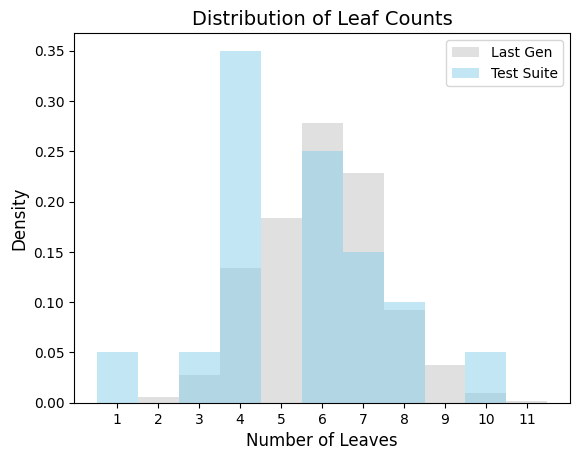

In [8]:
leafs_20 = np.array([leafs(graph) for graph in graph_population_20])                                      
leafs_lastgen = np.array([leafs(graph) for graph in graph_population_lastgen])                            
                                                                                                        
all_leafs = np.concatenate([leafs_20, leafs_lastgen])                                                     
bins = np.arange(all_leafs.min(), all_leafs.max() + 2) - 0.5                                              
                                                                                                        
plt.hist(leafs_lastgen, bins=bins, density=True, color='lightgray', alpha=0.7,         
label='Last Gen')                                                                                         
plt.hist(leafs_20, bins=bins, density=True, color='skyblue', alpha=0.5, label='Test Suite')                                                                                                     
                                                                                                        
plt.title('Distribution of Leaf Counts', fontsize=14)                                                     
plt.xlabel('Number of Leaves', fontsize=12)                                                               
plt.ylabel('Density', fontsize=12)                                                                        
plt.legend()                                                                                              
                                                                                                        
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))        
plt.gca().set_xticks(np.arange(all_leafs.min(), all_leafs.max() + 1))                                      
plt.savefig(f'data/ariel_zoo/{NAME}_leaf_histogram.png', dpi=300)

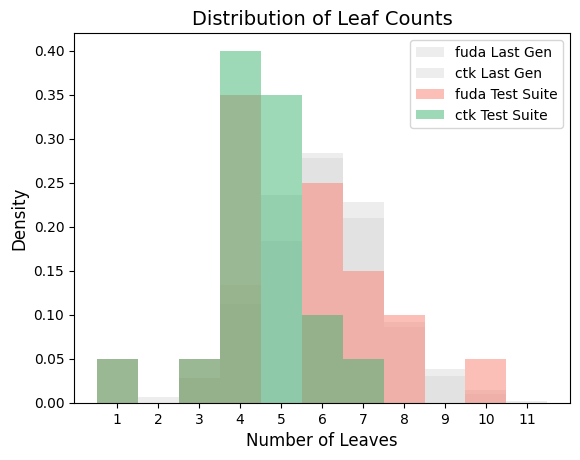

In [17]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                                                                     
methods = {                                                                                               
    'fuda': {                                                                                             
        'data_20': 'data/ariel_zoo/fuda_20.csv',                                                          
        'data_lastgen': 'data/ariel_lastgen/fuda.csv',                                                    
        'color': 'salmon',                                                                               
    },                                                                                                    
    'ctk': {                                                                                              
        'data_20': 'data/ariel_zoo/ctk_20.csv',                                                           
        'data_lastgen': 'data/ariel_lastgen/ctk.csv',                                                     
        'color': 'mediumseagreen',                                                                                
    },                                                                                                    
}                                                                                                         
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                                                                     
                                                                                                        
# Load everything                                                                                         
for name, m in methods.items():                                                                           
    strings_20 = pd.read_csv(m['data_20'])['ctk_string']                                                  
    strings_lastgen = pd.read_csv(m['data_lastgen'])['ctk_string']                                        
    m['graphs_20'] = [ctk.node_from_string(s).to_graph() for s in strings_20]                             
    m['graphs_lastgen'] = [ctk.node_from_string(s).to_graph() for s in strings_lastgen]                   
    m['leafs_20'] = np.array([leafs(g) for g in m['graphs_20']])                                          
    m['leafs_lastgen'] = np.array([leafs(g) for g in m['graphs_lastgen']])                                
                                                                                                                                                                          
                                                                                                        
all_leafs = np.concatenate([m['leafs_20'] for m in methods.values()]                                      
                        + [m['leafs_lastgen'] for m in methods.values()])                                
bins = np.arange(all_leafs.min(), all_leafs.max() + 2) - 0.5                                              
                                                                                                        
# Last gens in gray (behind)                                                                              
for name, m in methods.items():                                                                           
    plt.hist(m['leafs_lastgen'], bins=bins, density=True, color='lightgray', alpha=0.4,                   
            label=f'{name} Last Gen')                                                                    
                                                                                                        
# Selected 20s in color (on top)                                                                          
for name, m in methods.items():                                                                           
    plt.hist(m['leafs_20'], bins=bins, density=True, color=m['color'], alpha=0.5,                         
            label=f'{name} Test Suite')                                                                  
                                                                                                        
plt.title('Distribution of Leaf Counts', fontsize=14)                                                     
plt.xlabel('Number of Leaves', fontsize=12)                                                               
plt.ylabel('Density', fontsize=12)                                                                        
plt.legend()                                                                                              
plt.gca().set_xticks(np.arange(all_leafs.min(), all_leafs.max() + 1))                                     
plt.savefig('data/ariel_zoo/combined_leaf_histogram.png', dpi=300)   

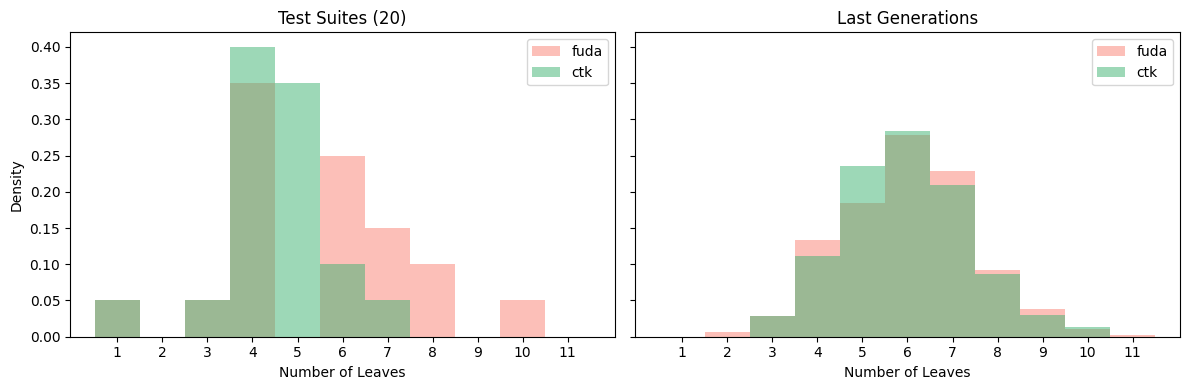

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)                                        
                                                                                                            
all_leafs = np.concatenate([m['leafs_20'] for m in methods.values()]                                      
                        + [m['leafs_lastgen'] for m in methods.values()])                                
bins = np.arange(all_leafs.min(), all_leafs.max() + 2) - 0.5                                              
xticks = np.arange(all_leafs.min(), all_leafs.max() + 1)                                                  
                                                                                                        
# Left: Test Suites                                                                                       
for name, m in methods.items():                                                                           
    ax1.hist(m['leafs_20'], bins=bins, density=True, color=m['color'], alpha=0.5, label=name)             
ax1.set_title('Test Suites (20)')                                                                         
ax1.set_xlabel('Number of Leaves')                                                                        
ax1.set_ylabel('Density')                                                                                 
ax1.set_xticks(xticks)                                                                                    
ax1.legend()                                                                                              
                                                                                                        
# Right: Last Gens                                                                                        
for name, m in methods.items():                                                                           
    ax2.hist(m['leafs_lastgen'], bins=bins, density=True, color=m['color'], alpha=0.5, label=name)        
ax2.set_title('Last Generations')                                                                         
ax2.set_xlabel('Number of Leaves')                                                                        
ax2.set_xticks(xticks)                                                                                    
ax2.legend()                                                                                              
                                                                                                        
plt.tight_layout()                                                                                        
plt.savefig('data/ariel_zoo/combined_leaf_histogram.png', dpi=300) 

In [7]:
spaces = ctk.Space.all_spaces()

series_list = [
    ctk.series_from_graph_population(graph_population, space_config=ctk.SimilaritySpaceConfig(space=space))
    for space in spaces
]
pop_frame = ctk.SimilarityFrame(series=series_list)

pop_archive = ctk.SimilarityArchive([pop_frame], id_mapper={0: {i:i for i in range(len(graph_population))}}, alive_mapper={0: {i:True for i in range(len(graph_population))}})

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│    1 spaces = ctk.Space.all_spaces()                                                             │
│    2                                                                                             │
│    3 series_list = [                                                                             │
│ ❱  4 │   ctk.series_from_graph_population(graph_population, space_config=ctk.SimilaritySpaceC    │
│    5 │   for space in spaces                                                                     │
│    6 ]                                                                                           │
│    7 pop_frame = ctk.SimilarityFrame(series=series_list)                                         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'graph_population' is not defined

### HEATMAPS

all r, all spaces

In [ ]:
cosine = pop_archive.map('cosine_similarity', inplace=False)

In [ ]:
heatmap_plot = cosine[0]

heatmap_plotter = ctk.GridPlotter()
heatmap_plotter.add_2D_numeric_data(
    data_2d=heatmap_plot.get_2d_data(), 
    titles_2d=heatmap_plot.get_2d_titles(),
    cmap="Blues"
)
heatmap_plotter.config.col_space = 0.05
heatmap_plotter.config.row_space = 0.2
heatmap_plotter.add_global_colorbar("right")
heatmap_plotter.transpose()
heatmap_plotter.show()

aggregated space embeddings

In [ ]:
cosine_space_agg = pop_archive.map('aggregate').map('cosine_similarity')

In [ ]:
heatmap_plot = cosine_space_agg[0]

heatmap_plotter = ctk.GridPlotter()
heatmap_plotter.add_2D_numeric_data(
    data_2d=heatmap_plot.get_2d_data(), 
    titles_2d=heatmap_plot.get_2d_titles(),
    cmap="Blues"
)
heatmap_plotter.config.col_space = 0.05
heatmap_plotter.config.row_space = 0.2
heatmap_plotter.add_global_colorbar("right")
# heatmap_plotter.transpose()
heatmap_plotter.show()

---

### Umap Space embeddings

In [ ]:
# # color prep for dots

# df_all = survivors_df.reset_index()
# norm = mcolors.Normalize(vmin=df_all.fitness.min(), vmax=df_all.fitness.max())
# cmap = plt.get_cmap('RdYlGn')
# dot_ids = df_all.id.tolist()
# dot_colors = [mcolors.to_hex(cmap(norm(f))) for f in df_all.fitness]
# top_5_ids = set(df_all.sort_values('fitness', ascending=False).head(5).id)
# dot_sizes = [9 if i in top_5_ids else 4 for i in dot_ids]

In [ ]:
num_samples = 3
umap_n = 5

DEFAULT_SIZE = 5

In [ ]:
# alive = alive.downsample(4)

In [ ]:

to_fit = pop_archive[:, :, ::]

grid = ctk.TransformerGrid(to_fit[0].grab_frame().shape)

umap = umap = ctk.UmapConfig(
    n_neighbors=umap_n,
).get_umap()  
print(umap)

grid[:,:] = umap

In [ ]:
subset = to_fit.new_only(inplace=False)
subset.fit_grid(grid)

In [ ]:
to_embed = to_fit[:, :, [0, -1]]

to_embed.transform_grid(grid)

In [ ]:
import matplotlib.pyplot as plt                                                                                 
from matplotlib.cm import ScalarMappable  

In [ ]:
to_plot_embed = to_embed[0]


umap_plotter = ctk.GridPlotter()
umap_plotter.add_2D_numeric_data(
    data_2d=to_plot_embed.get_2d_data(), 
    titles_2d=to_plot_embed.get_2d_titles(),
    global_ids_2d=to_plot_embed.get_2d_ids(),
)
# umap_plotter.add_id_styling(ids=unique_colors_df['id'], colors=unique_colors_df['novelty_color'], alphas=[0.5]*len(unique_colors_df['id']))
umap_plotter.config.col_space = 0
umap_plotter.config.row_space = 0.2
umap_plotter.transpose()
umap_plotter.set_global_axis_limits(padding=0.1)

umap_plotter[:-1, :].set_xticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter.suptitle('CTK Initial population. All radii and spaces')

umap_plotter.config.margin = (0.5, 0.2,0,0)

# sm = ScalarMappable(cmap=cmap_nov, norm=norm_nov)                                                               
# umap_plotter.add_global_colorbar(mappable=sm, label='Novelty') 

umap_plotter.show()
umap_plotter.save('ctk_initial_allr_allspace.png')

begin and end of r agg

In [ ]:

to_fit = pop_archive.map('to_cumulative', inplace=False)

grid = ctk.TransformerGrid(to_fit[0].grab_frame().shape)

umap = umap = ctk.UmapConfig(
    n_neighbors=umap_n,
    min_dist=0.1,
).get_umap()  
print(umap)

grid[:,:] = umap

In [ ]:
subset = to_fit.new_only(inplace=False)
subset.fit_grid(grid)

In [ ]:
to_embed = to_fit[:, :, [0, -1]]
to_embed.transform_grid(grid)

In [ ]:
to_plot_embed = to_embed[0]


umap_plotter = ctk.GridPlotter()
umap_plotter.add_2D_numeric_data(
    data_2d=to_plot_embed.get_2d_data(), 
    titles_2d=to_plot_embed.get_2d_titles(),
    global_ids_2d=to_plot_embed.get_2d_ids(),
)
# umap_plotter.add_id_styling(ids=unique_colors_df['id'], colors=unique_colors_df['novelty_color'], alphas=[0.5]*len(unique_colors_df['id']))
umap_plotter.config.col_space = 0
umap_plotter.config.row_space = 0.2
umap_plotter.transpose()
umap_plotter.set_global_axis_limits(padding=0.1)

umap_plotter[:-1, :].set_xticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter.suptitle('CTK Initial population. Agg radii and all spaces')

umap_plotter.config.margin = (0.5, 0.2,0,0)

# sm = ScalarMappable(cmap=cmap_nov, norm=norm_nov)                                                               
# umap_plotter.add_global_colorbar(mappable=sm, label='Novelty') 

umap_plotter.show()
umap_plotter.save('ctk_initial_aggr_allspace.png')

begin and end of space agg

In [ ]:
to_fit = pop_archive.map('aggregate')

grid = ctk.TransformerGrid(to_fit[0].grab_frame().shape)

umap = ctk.UmapConfig(
    n_neighbors=umap_n,
).get_umap()  
print(umap)

grid[:,:] = umap

In [ ]:
subset = to_fit.new_only(inplace=False)
subset.fit_grid(grid)

In [ ]:
to_embed = to_fit[:, :, 0]
to_embed.transform_grid(grid)

evolution of r and space agg

In [ ]:
to_fit = pop_archive.map('to_cumulative', inplace=False).map('aggregate')

grid = ctk.TransformerGrid(to_fit[0].grab_frame().shape)

umap = umap = ctk.UmapConfig(
    n_neighbors=umap_n,
).get_umap()  
print(umap)

grid[:,:] = umap

In [ ]:
subset = to_fit.new_only(inplace=False)
subset.fit_grid(grid)

In [ ]:
to_embed = to_fit[:, :, 0]
to_embed.transform_grid(grid)

In [ ]:
to_plot_embed = to_embed[:, :, :]

umap_plotter = ctk.GridPlotter()
umap_plotter.add_2D_numeric_data(
    data_2d=to_plot_embed.get_2d_data(), 
    titles_2d=to_plot_embed.get_2d_titles(),
    global_ids_2d=to_plot_embed.get_2d_ids(),
)
# umap_plotter.add_id_styling(ids=unique_colors_df['id'], colors=unique_colors_df['novelty_color'], alphas=[0.5]*len(unique_colors_df['id']))
umap_plotter.config.col_space = 0
umap_plotter.config.row_space = 0.2
umap_plotter.transpose()
umap_plotter.set_global_axis_limits(padding=0.1)

umap_plotter[:-1, :].set_xticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter.suptitle('CTK Evolution of population. Agg radii and Agg spaces')

umap_plotter.config.margin = (0.5, 0.2,0,0)

# sm = ScalarMappable(cmap=cmap_nov, norm=norm_nov)                                                               
# umap_plotter.add_global_colorbar(mappable=sm, label='Novelty') 

umap_plotter.show()
umap_plotter.save('ctk_evol_aggr_aggspace.png')

---

In [ ]:
from os import error


raise error

In [ ]:
to_fit = alive.replace()

grid = ctk.TransformerGrid(to_fit[0].grab_frame().shape)
umap = umap = ctk.UmapConfig(
    n_neighbors=5,
).get_umap()  
print(umap)
grid[:,:] = umap

In [ ]:
subset = to_fit.new_only(inplace=False)
subset.fit_grid(grid)

In [ ]:
to_embed = alive.replace()[:, :, 0]
to_embed.transform_grid(grid)

1 GEN (START), all r, all spaces

In [ ]:
to_plot_embed = to_embed[0]


umap_plotter = ctk.GridPlotter()
umap_plotter.add_2D_numeric_data(
    data_2d=to_plot_embed.get_2d_data(), 
    titles_2d=to_plot_embed.get_2d_titles(),
    global_ids_2d=to_plot_embed.get_2d_ids(),
)
umap_plotter.add_id_styling(ids=dot_ids, colors=dot_colors, sizes=dot_sizes, alphas=[0.5]*len(dot_ids))
umap_plotter.config.col_space = 0
umap_plotter.config.row_space = 0.2
umap_plotter.transpose()
umap_plotter.set_global_axis_limits(padding=0.1)

umap_plotter[:-1, :].set_xticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter.show()

1 GEN (end), all r, all spaces

In [ ]:
to_plot_embed = to_embed[-1]


umap_plotter = ctk.GridPlotter()
umap_plotter.add_2D_numeric_data(
    data_2d=to_plot_embed.get_2d_data(), 
    titles_2d=to_plot_embed.get_2d_titles(),
    global_ids_2d=to_plot_embed.get_2d_ids(),
)
umap_plotter.add_id_styling(ids=dot_ids, colors=dot_colors, sizes=dot_sizes, alphas=[0.5]*len(dot_ids))
umap_plotter.config.col_space = 0
umap_plotter.config.row_space = 0.2
umap_plotter.transpose()
umap_plotter.set_global_axis_limits(padding=0.1)

umap_plotter[:-1, :].set_xticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter.show()

1 RADIUS [pick], all spaces, show evolution

In [ ]:
to_plot_embed = to_embed[2, :, :]


umap_plotter = ctk.GridPlotter()
umap_plotter.add_2D_numeric_data(
    data_2d=to_plot_embed.get_2d_data(), 
    titles_2d=to_plot_embed.get_2d_titles(),
    global_ids_2d=to_plot_embed.get_2d_ids(),
)
umap_plotter.add_id_styling(ids=dot_ids, colors=dot_colors, sizes=dot_sizes, alphas=[0.5]*len(dot_ids))
umap_plotter.config.col_space = 0
umap_plotter.config.row_space = 0.2
umap_plotter.transpose()
umap_plotter.set_global_axis_limits(padding=0.1)

# umap_plotter[:-1, :].set_xticklabels([])
# umap_plotter[:, 1:].set_yticklabels([])
# umap_plotter[:, 1:].set_yticklabels([])
umap_plotter.show()

### r [AGG]

In [ ]:
to_fit_ragg = alive.map('to_cumulative', inplace=False)

grid = ctk.TransformerGrid(to_fit_ragg[0].grab_frame().shape)
umap = umap = ctk.UmapConfig(
    n_neighbors=5,
    random_state=None,
    transform_seed=None,
    n_jobs=-1
).get_umap()  
print(umap)
grid[:,:] = umap

In [ ]:
subset = to_fit_ragg.new_only(inplace=False)
subset.fit_grid(grid)

In [ ]:
to_embed = to_fit_ragg[:, :, ::5]
to_embed.transform_grid(grid)

1 GEN (start), all r [AGG], all spaces

In [ ]:
to_plot_embed = to_embed[0]


umap_plotter = ctk.GridPlotter()
umap_plotter.add_2D_numeric_data(
    data_2d=to_plot_embed.get_2d_data(), 
    titles_2d=to_plot_embed.get_2d_titles(),
    global_ids_2d=to_plot_embed.get_2d_ids(),
)
umap_plotter.add_id_styling(ids=dot_ids, colors=dot_colors, sizes=dot_sizes, alphas=[0.5]*len(dot_ids))
umap_plotter.config.col_space = 0
umap_plotter.config.row_space = 0.2
umap_plotter.transpose()
umap_plotter.set_global_axis_limits(padding=0.1)

umap_plotter[:-1, :].set_xticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter.show()

1 GEN (end), all r [AGG], all spaces

In [ ]:
to_plot_embed = to_embed[-1]


umap_plotter = ctk.GridPlotter()
umap_plotter.add_2D_numeric_data(
    data_2d=to_plot_embed.get_2d_data(), 
    titles_2d=to_plot_embed.get_2d_titles(),
    global_ids_2d=to_plot_embed.get_2d_ids(),
)
umap_plotter.add_id_styling(ids=dot_ids, colors=dot_colors, sizes=dot_sizes, alphas=[0.5]*len(dot_ids))
umap_plotter.config.col_space = 0
umap_plotter.config.row_space = 0.2
umap_plotter.transpose()
umap_plotter.set_global_axis_limits(padding=0.1)

umap_plotter[:-1, :].set_xticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter[:, 1:].set_yticklabels([])
umap_plotter.show()

1 r [AGG] [pick], all spaces, show evolution

In [ ]:
to_plot_embed = to_embed[1, :, ::5]


umap_plotter = ctk.GridPlotter()
umap_plotter.add_2D_numeric_data(
    data_2d=to_plot_embed.get_2d_data(), 
    titles_2d=to_plot_embed.get_2d_titles(),
    global_ids_2d=to_plot_embed.get_2d_ids(),
)
umap_plotter.add_id_styling(ids=dot_ids, colors=dot_colors, sizes=dot_sizes, alphas=[0.5]*len(dot_ids))
umap_plotter.config.col_space = 0
umap_plotter.config.row_space = 0.2
umap_plotter.transpose()
umap_plotter.set_global_axis_limits(padding=0.1)

# umap_plotter[:-1, :].set_xticklabels([])
# umap_plotter[:, 1:].set_yticklabels([])
# umap_plotter[:, 1:].set_yticklabels([])
umap_plotter.show()

### [AGG] spaces

In [ ]:
to_fit_sagg = alive.replace().map('aggregate')[:, :, :]

grid = ctk.TransformerGrid(to_fit_sagg[0].grab_frame().shape)
umap = umap = ctk.UmapConfig(
    n_neighbors=5,
    random_state=None,
    transform_seed=None,
    n_jobs=-1
).get_umap()  
print(umap)
grid[:,:] = umap

print(to_fit_sagg)

In [ ]:
subset = to_fit_sagg.new_only(inplace=False)
subset.fit_grid(grid)

In [ ]:
to_embed = to_fit_sagg[:, :, ::5]
to_embed.transform_grid(grid)

1 GEN (start), all r, 1 [AGG] space

In [ ]:
to_plot_embed = to_embed[0]


umap_plotter = ctk.GridPlotter()
umap_plotter.add_2D_numeric_data(
    data_2d=to_plot_embed.get_2d_data(), 
    titles_2d=to_plot_embed.get_2d_titles(),
    global_ids_2d=to_plot_embed.get_2d_ids(),
)
umap_plotter.add_id_styling(ids=dot_ids, colors=dot_colors, sizes=dot_sizes, alphas=[0.5]*len(dot_ids))
umap_plotter.config.col_space = 0
umap_plotter.config.row_space = 0.2
umap_plotter.transpose()
umap_plotter.set_global_axis_limits(padding=0.1)

# umap_plotter[:-1, :].set_xticklabels([])
# umap_plotter[:, 1:].set_yticklabels([])
# umap_plotter[:, 1:].set_yticklabels([])
umap_plotter.show()

1 GEN (start), all r, 1 [AGG] space

In [ ]:
to_plot_embed = to_embed[-1]

umap_plotter = ctk.GridPlotter()
umap_plotter.add_2D_numeric_data(
    data_2d=to_plot_embed.get_2d_data(), 
    titles_2d=to_plot_embed.get_2d_titles(),
    global_ids_2d=to_plot_embed.get_2d_ids(),
)
umap_plotter.add_id_styling(ids=dot_ids, colors=dot_colors, sizes=dot_sizes, alphas=[0.5]*len(dot_ids))
umap_plotter.config.col_space = 0
umap_plotter.config.row_space = 0.2
umap_plotter.transpose()
umap_plotter.set_global_axis_limits(padding=0.1)

# umap_plotter[:-1, :].set_xticklabels([])
# umap_plotter[:, 1:].set_yticklabels([])
# umap_plotter[:, 1:].set_yticklabels([])
umap_plotter.show()

all r, 1 space [agg], show evolution

In [ ]:
to_plot_embed = to_embed[:, 0, ::5]

umap_plotter = ctk.GridPlotter()
umap_plotter.add_2D_numeric_data(
    data_2d=to_plot_embed.get_2d_data(), 
    titles_2d=to_plot_embed.get_2d_titles(),
    global_ids_2d=to_plot_embed.get_2d_ids(),
)
umap_plotter.add_id_styling(ids=dot_ids, colors=dot_colors, sizes=dot_sizes, alphas=[0.5]*len(dot_ids))
umap_plotter.config.col_space = 0
umap_plotter.config.row_space = 0.2
umap_plotter.transpose()
umap_plotter.set_global_axis_limits(padding=0.1)

# umap_plotter[:-1, :].set_xticklabels([])
# umap_plotter[:, 1:].set_yticklabels([])
# umap_plotter[:, 1:].set_yticklabels([])
umap_plotter.show()

In [ ]:
to_fit_ragg = alive.map('to_cumulative', inplace=False)

grid = ctk.TransformerGrid(to_fit_ragg[0].grab_frame().shape)
umap = umap = ctk.UmapConfig(
    n_neighbors=5,
    random_state=None,
    transform_seed=None,
    n_jobs=-1
).get_umap()  
print(umap)
grid[:,:] = umap

In [ ]:
subset = to_fit_ragg.new_only(inplace=False)
subset.fit_grid(grid)

In [ ]:
to_embed = to_fit_ragg[:, :, ::5]
to_embed.transform_grid(grid)

In [ ]:
umap_plotter = ctk.GridPlotter()
umap_plotter.add_collapsed_data(
    data=to_plot_embed.get_2d_data(), 
    title=to_plot_embed.get_2d_titles()[0][0][:-7]
)
umap_plotter.show()
umap_plotter.to_gif(filepath=f"{config.OUTPUT_FOLDER}/{to_plot_embed.get_2d_titles()[0][0][:-7].strip().lower().replace(',', '_').replace(' ', '_')}.gif")

### r [AGG] space [AGG]

In [ ]:
to_fit_rsagg = alive.map('aggregate').map('aggregate')

grid = ctk.TransformerGrid(to_fit_rsagg[0].grab_frame().shape)
umap = umap = ctk.UmapConfig(
    n_neighbors=5,
    random_state=None,
    transform_seed=None,
    n_jobs=-1
).get_umap()  
print(umap)
grid[:,:] = umap

In [ ]:
subset = to_fit_rsagg.new_only(inplace=False)
subset.fit_grid(grid)

In [ ]:
to_embed = to_fit_rsagg[:, :, ::5]
to_embed.transform_grid(grid)

1 r [agg], 1 space [agg] show evolution

In [ ]:
to_plot_embed = to_embed[:, :, ::5]

umap_plotter = ctk.GridPlotter()
umap_plotter.add_2D_numeric_data(
    data_2d=to_plot_embed.get_2d_data(), 
    titles_2d=to_plot_embed.get_2d_titles(),
    global_ids_2d=to_plot_embed.get_2d_ids(),
)
umap_plotter.add_id_styling(ids=dot_ids, colors=dot_colors, sizes=dot_sizes, alphas=[0.5]*len(dot_ids))
umap_plotter.config.col_space = 0
umap_plotter.config.row_space = 0.2
umap_plotter.transpose()
umap_plotter.set_global_axis_limits(padding=0.1)

# umap_plotter[:-1, :].set_xticklabels([])
# umap_plotter[:, 1:].set_yticklabels([])
# umap_plotter[:, 1:].set_yticklabels([])
umap_plotter.show()

show evolution in 1 image

In [ ]:
umap_plotter = ctk.GridPlotter()
umap_plotter.add_collapsed_data(
    data=to_plot_embed.get_2d_data(), 
    title=to_plot_embed.get_2d_titles()[0][0][:-7]
)
umap_plotter.show()
umap_plotter.to_gif(filepath=f"{config.OUTPUT_FOLDER}/{to_plot_embed.get_2d_titles()[0][0][:-7].strip().lower().replace(',', '_').replace(' ', '_')}.gif")